In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

LOAD THE CSV DATA TO PANDAS DATAFRAME

In [ ]:
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [ ]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
gold_data.shape

(2290, 6)

In [ ]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [ ]:
print(gold_data.dtypes)


Date        object
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object


In [ ]:
print(type(gold_data))  # Should be <class 'pandas.core.frame.DataFrame'>


<class 'pandas.core.frame.DataFrame'>


FINDING OUT CORRELATION BETWEEN COLUMNS


1.POSITIVE CORRELATION


2.NEGATIVE CORRELATION

In [ ]:
correlation = gold_data.drop(columns=['Date']).corr()


CONSTRUCTING HEATMAP FOR FINDING OUT CORRELATION

<Axes: >

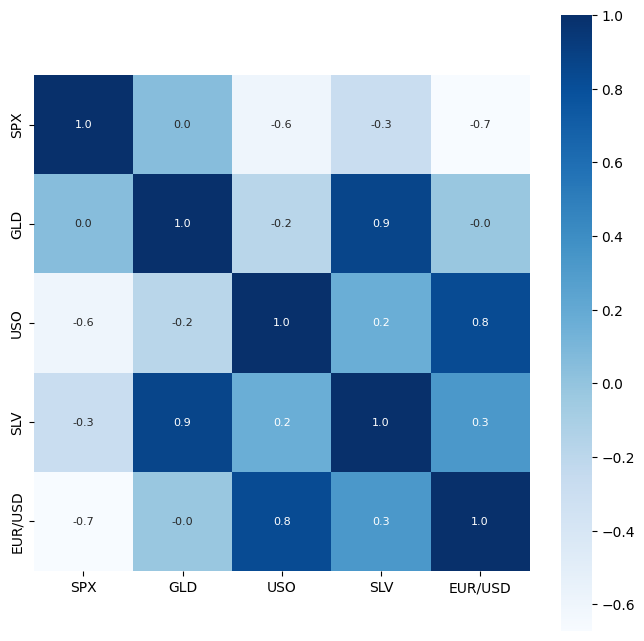

In [ ]:
plt.figure(figsize =(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [ ]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


CHECH THE DISTRIBUTION OF GOLD PRICE


/tmp/ipython-input-38-4227780549.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

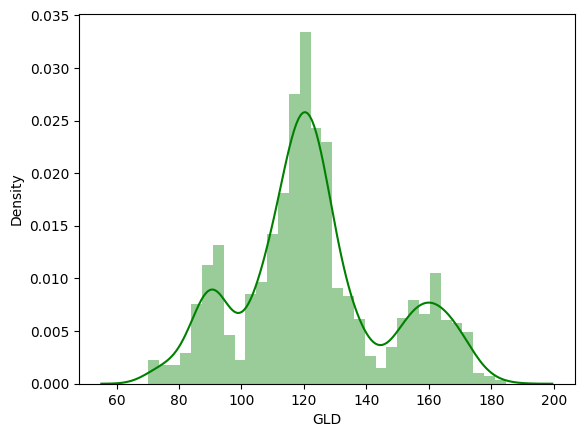

In [ ]:
sns.distplot(gold_data['GLD'],color='green')

splitting the freature and target

In [ ]:
x = gold_data.drop(['Date','GLD'],axis=1)
y = gold_data['GLD']

In [ ]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


splitting into trining data and test data

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=42)

MODEL TRAINING:

RANDOM FOREST REGRESSION

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
test_data_prediction = regressor.predict(x_test)

In [ ]:
print(test_data_prediction)

[122.45999897 130.34980324 127.55080015  96.8090974  118.86710028
 114.43969896 124.89210139 117.68009929 108.00640133  98.25830023
  95.27009948 167.80589757 148.1236012  116.43550034 170.66820089
  84.90799996 123.3263987  109.78149726 113.2185011  131.57610269
 124.28459891 113.53900068 116.15340014 108.89169974 108.46040147
 125.84219911 119.09419986 112.17339941 113.32600157 125.56899946
 146.27630205  89.42349992 167.69029968 113.50359946 108.53850097
 120.27710112 142.19159866 161.12330179 174.02339824 152.84550143
 119.21920093 113.51970044 121.33939949 113.70779961 122.04150013
 108.02040107  88.23139903 114.52749931 129.57300254 117.8373008
 103.77320024 129.58260268 107.11959819 160.63560324 131.42420053
 118.6213     146.83300117 136.88170205  95.66280092 124.66420146
 115.15609884  85.92970088 104.22679909 113.91970067  83.96949906
 122.27640008 116.56119919 113.48670208 164.99420316  92.58739982
  80.09440097 161.02610127 158.02540249 106.87699996 147.67710098
 109.637097

In [ ]:
# R squared value (for comparision)

In [ ]:
error_score = metrics.r2_score(y_test, test_data_prediction)
print(error_score)

0.9898201989410478


compare the actual value and predicted value in a plot

In [ ]:
y_test = list(y_test)

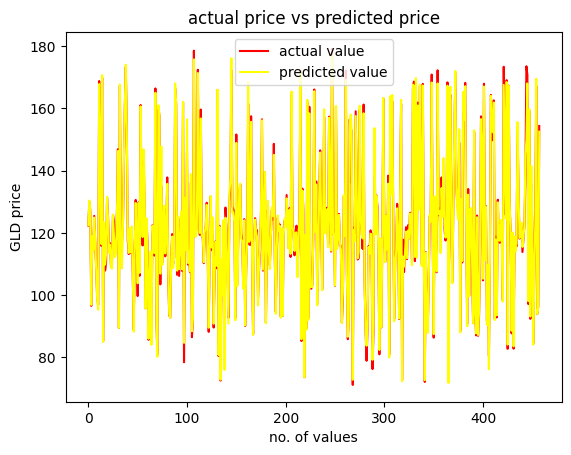

In [ ]:
plt.plot(y_test, color='red', label='actual value')
plt.plot(test_data_prediction, color='yellow', label='predicted value')
plt.title('actual price vs predicted price')
plt.xlabel('no. of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()